Connected to Riboseq (Python 3.9.20)

In [24]:
three_prime_coverage_file = '/projects/splitorfs/work/Riboseq/Output/Riboseq_genomic_single_samples/resample_q10_expression_filter/NMD_genome/ERR3367797/3_primes_genomic_merged_numbered_ERR3367797_windows_coverage.tsv'
cds_coverage_file = '/projects/splitorfs/work/Riboseq/Output/Riboseq_genomic_single_samples/resample_q10_expression_filter/NMD_genome/ERR3367797/Ens_110_CDS_coordinates_genomic_protein_coding_tsl_refseq_filtered_ERR3367797_windows_coverage.tsv'
sample = 'ERR3367797'

In [25]:
import os
import pandas as pd
import argparse
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/tmp/ipykernel_3863054/216683275.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  three_prime_coverage_file_df = pd.read_csv(
/tmp/ipykernel_3863054/216683275.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cds_coverage_file_df = pd.read_csv(


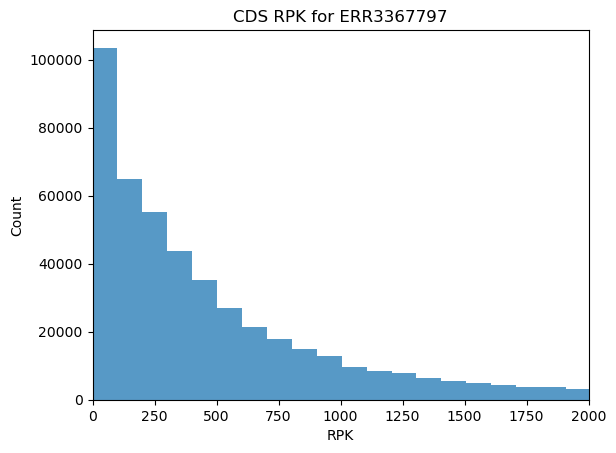

In [26]:
    outdir = os.path.dirname(three_prime_coverage_file)

    three_prime_coverage_file_df = pd.read_csv(
        three_prime_coverage_file, sep='\t', header=None,
        names=['chr', 'start', 'stop', '3_prime_name', 'nr_overlap_reads', 'nr_bases_covered', 'length_3_prime_UTR', 'covered_fraction'])

    # length normalization of reads
    three_prime_coverage_file_df['RPK'] = three_prime_coverage_file_df['nr_overlap_reads'] / \
        (three_prime_coverage_file_df['length_3_prime_UTR']/1000)

    cds_coverage_file_df = pd.read_csv(
        cds_coverage_file, sep='\t', header=None,
        names=['chr', 'start', 'stop', '3_prime_name', 'nr_overlap_reads', 'nr_bases_covered', 'length_cds', 'covered_fraction'])

    # length normalization of reads
    cds_coverage_file_df['RPK'] = cds_coverage_file_df['nr_overlap_reads'] / \
        (cds_coverage_file_df['length_cds']/1000)

    # plot RPK distribution CDS hist
    ax = sbn.histplot(
        cds_coverage_file_df, x='RPK', bins=15000)
    ax.set_xlim(0, 2000)
    ax.set_title(f'CDS RPK for {sample}')
    plt.show()



In [27]:
cds_coverage_file_df['RPK']

0           0.000000
1           0.000000
2          40.000000
3           0.000000
4           0.000000
             ...    
509360    100.000000
509361    140.000000
509362    105.263158
509363     60.000000
509364      0.000000
Name: RPK, Length: 509365, dtype: float64

In [28]:
cds_coverage_file_df['log_RPK'] = np.log10(cds_coverage_file_df['RPK'])

/home/ckalk/miniforge-pypy3/envs/Riboseq/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


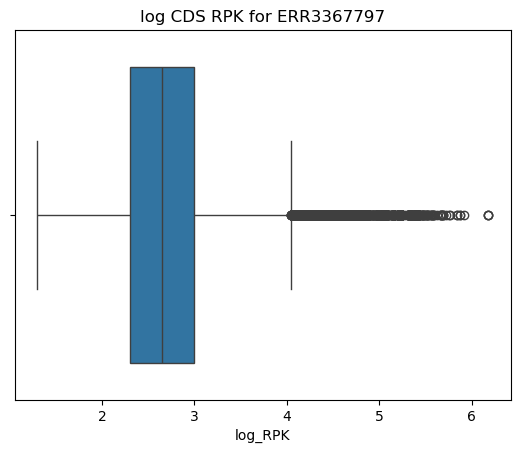

In [29]:
    ax = sbn.boxplot(
        cds_coverage_file_df, x='log_RPK')
    ax.set_title(f'log CDS RPK for {sample}')
    plt.show()



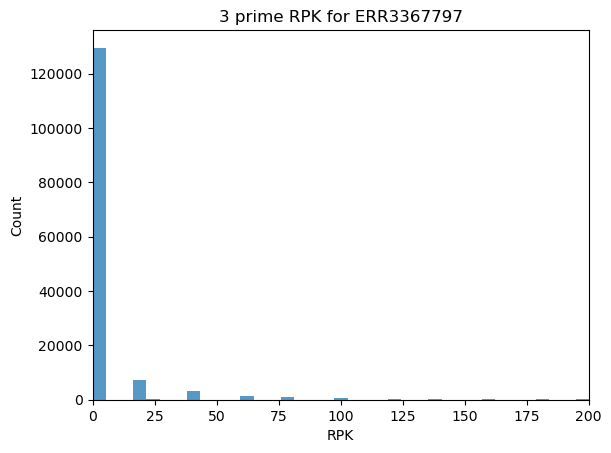

In [30]:
    ax = sbn.histplot(
        three_prime_coverage_file_df, x='RPK', bins=15000)
    ax.set_xlim(0, 200)
    ax.set_title(f'3 prime RPK for {sample}')
    plt.show()



In [31]:
    print('CDS 25th quantile', cds_coverage_file_df['RPK'].quantile(0.25))
    print('CDS median', cds_coverage_file_df['RPK'].quantile(0.5))



CDS 25th quantile 140.0
CDS median 380.0


In [32]:
    print('three prime 25th quantile',
          three_prime_coverage_file_df['RPK'].quantile(0.25))
    print('three prime median',
          three_prime_coverage_file_df['RPK'].quantile(0.5))
    print('three prime 75th quantile',
          three_prime_coverage_file_df['RPK'].quantile(0.75))



three prime 25th quantile 0.0
three prime median 0.0
three prime 75th quantile 0.0


In [33]:
three_prime_coverage_file_df['RPK'].quantile(0.9)

20.0

In [34]:
three_prime_coverage_file_df['RPK'].quantile(0.95)

40.0

In [35]:
cds_coverage_file_df['RPK'].quantile(0.1)

0.0

In [36]:
cds_coverage_file_df['RPK'].quantile(0.15)

60.0

In [37]:
cds_coverage_file_df['log_RPK'] = np.log10(cds_coverage_file_df['RPK'] + 1)

In [38]:
cds_coverage_file_df['log_RPK']

0         0.000000
1         0.000000
2         1.612784
3         0.000000
4         0.000000
            ...   
509360    2.004321
509361    2.149219
509362    2.026383
509363    1.785330
509364    0.000000
Name: log_RPK, Length: 509365, dtype: float64

In [39]:
    three_prime_coverage_file_df['log_RPK'] = np.log10(
        three_prime_coverage_file_df['RPK'] + 1)



In [40]:
three_prime_coverage_file_df['log_RPK']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
146161    0.0
146162    0.0
146163    0.0
146164    0.0
146165    0.0
Name: log_RPK, Length: 146166, dtype: float64

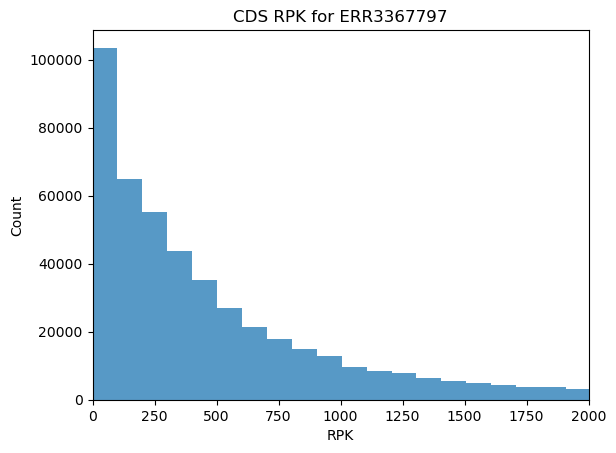

In [41]:

    # plot RPK distribution CDS hist
    ax = sbn.histplot(
        cds_coverage_file_df, x='RPK', bins=15000)
    ax.set_xlim(0, 2000)
    ax.set_title(f'CDS RPK for {sample}')
    plt.show()



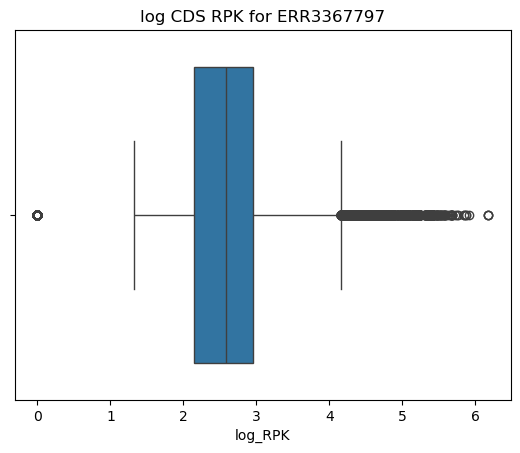

In [42]:
    # plot RPK distribution CDS box
    ax = sbn.boxplot(
        cds_coverage_file_df, x='log_RPK')
    ax.set_title(f'log CDS RPK for {sample}')
    plt.show()



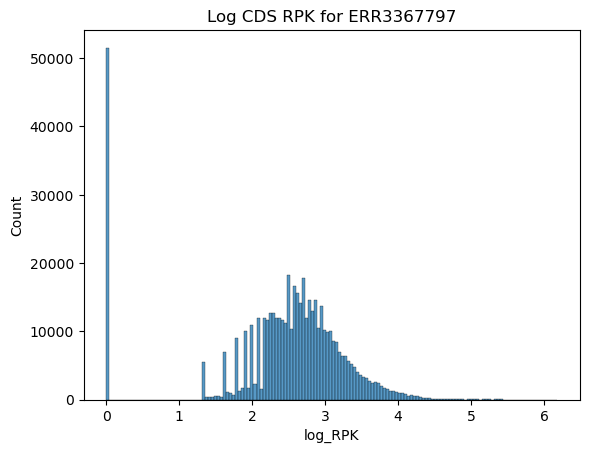

In [43]:
    ax = sbn.histplot(
        cds_coverage_file_df, x='log_RPK', bins=150)
    ax.set_title(f'Log CDS RPK for {sample}')
    plt.show()



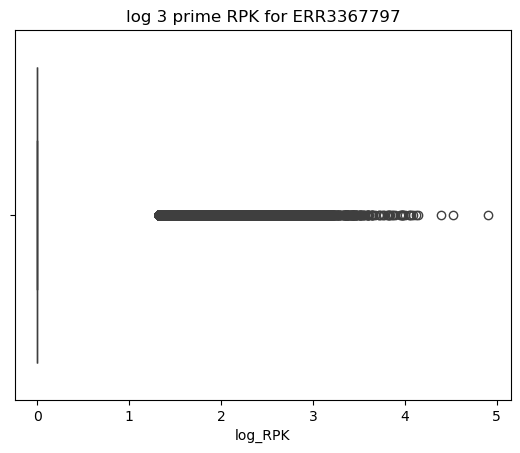

In [44]:
    ax = sbn.boxplot(
        three_prime_coverage_file_df, x='log_RPK')
    ax.set_title(f'log 3 prime RPK for {sample}')
    plt.show()



In [45]:
three_prime_coverage_file_df['RPK'] > 0

0         False
1         False
2         False
3         False
4         False
          ...  
146161    False
146162    False
146163    False
146164    False
146165    False
Name: RPK, Length: 146166, dtype: bool

In [46]:
three_prime_coverage_file_df[three_prime_coverage_file_df['RPK'] > 0]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
8,1,944603,944653,ENSG00000188976|ENST00000327044|0_9,1,29,50,0.580000,20.000000,1.322219
9,1,944653,944693,ENSG00000188976|ENST00000327044|0_10,5,13,40,0.325000,125.000000,2.100371
10,1,998964,999014,ENSG00000188290|ENST00000304952|3_1,1,28,50,0.560000,20.000000,1.322219
11,1,999014,999058,ENSG00000188290|ENST00000304952|3_2,1,29,44,0.659091,22.727273,1.375248
12,1,1054982,1055032,ENSG00000188157|ENST00000379370|4_1,1,27,50,0.540000,20.000000,1.322219
...,...,...,...,...,...,...,...,...,...,...
146048,X,154506471,154506521,ENSG00000071889|ENST00000447601|20351_7,1,29,50,0.580000,20.000000,1.322219
146052,X,154506671,154506721,ENSG00000071889|ENST00000447601|20351_11,1,28,50,0.560000,20.000000,1.322219
146054,X,154506771,154506810,ENSG00000071889|ENST00000447601|20351_13,2,12,39,0.307692,51.282051,1.718353
146055,X,155120151,155120168,"ENSG00000185515|ENST00000330045,ENSG0000018551...",2,9,17,0.529412,117.647059,2.074257


In [47]:
three_prime_coverage_file_df[three_prime_coverage_file_df['RPK'] > 100]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
9,1,944653,944693,ENSG00000188976|ENST00000327044|0_10,5,13,40,0.325000,125.000000,2.100371
72,1,1255162,1255202,ENSG00000160087|ENST00000349431|10_26,5,34,40,0.850000,125.000000,2.100371
80,1,1373780,1373800,"ENSG00000175756|ENST00000338370,ENSG0000017575...",7,20,20,1.000000,350.000000,2.545307
84,1,1402059,1402082,ENSG00000242485|ENST00000344843|21_4,15,23,23,1.000000,652.173913,2.815029
140,1,1786986,1787036,ENSG00000078369|ENST00000378609|34_35,13,50,50,1.000000,260.000000,2.416641
...,...,...,...,...,...,...,...,...,...,...
145968,X,154436042,154436092,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.320000,220.000000,2.344392
145969,X,154436092,154436142,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.320000,220.000000,2.344392
146002,X,154477925,154477943,ENSG00000196976|ENST00000357360|20347_4,2,18,18,1.000000,111.111111,2.049649
146055,X,155120151,155120168,"ENSG00000185515|ENST00000330045,ENSG0000018551...",2,9,17,0.529412,117.647059,2.074257


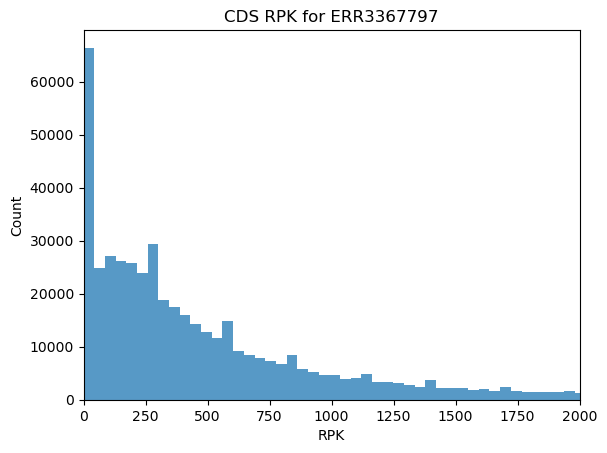

In [48]:
    # plot RPK distribution CDS hist
    ax = sbn.histplot(
        cds_coverage_file_df, x='RPK', bins=35000)


    ax.set_xlim(0, 2000)
    ax.set_title(f'CDS RPK for {sample}')
    plt.show()

In [49]:
three_prime_coverage_file_df[three_prime_coverage_file_df['RPK'] > 140]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
80,1,1373780,1373800,"ENSG00000175756|ENST00000338370,ENSG0000017575...",7,20,20,1.00,350.000000,2.545307
84,1,1402059,1402082,ENSG00000242485|ENST00000344843|21_4,15,23,23,1.00,652.173913,2.815029
140,1,1786986,1787036,ENSG00000078369|ENST00000378609|34_35,13,50,50,1.00,260.000000,2.416641
143,1,2403124,2403174,"ENSG00000157916|ENST00000378512,ENSG0000015791...",10,36,50,0.72,200.000000,2.303196
277,1,3781009,3781059,ENSG00000130764|ENST00000378251|62_50,10,50,50,1.00,200.000000,2.303196
...,...,...,...,...,...,...,...,...,...,...
145907,X,153929975,153929986,"ENSG00000102030|ENST00000464845,ENSG0000010203...",3,11,11,1.00,272.727273,2.437318
145965,X,154435892,154435942,"ENSG00000071553|ENST00000619046,ENSG0000007155...",12,50,50,1.00,240.000000,2.382017
145968,X,154436042,154436092,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.32,220.000000,2.344392
145969,X,154436092,154436142,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.32,220.000000,2.344392


In [50]:
from scipy import stats

# Fit exponential distribution
loc, scale = stats.expon.fit(cds_coverage_file_df['RPK'], floc=0)


lambda_hat = 1 / scale

print("Estimated lambda:", lambda_hat)

Estimated lambda: 0.0008312211067576386


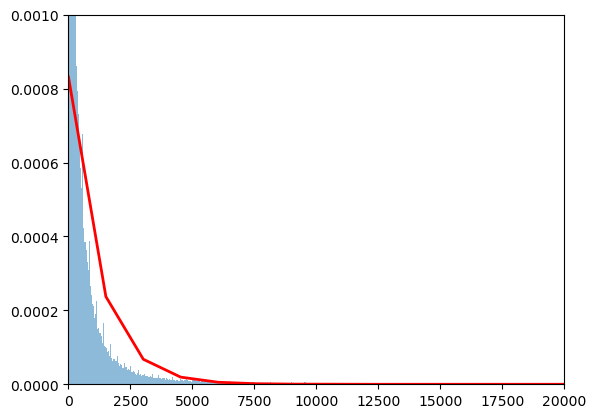

In [51]:
x = np.linspace(0, max(cds_coverage_file_df['RPK']), 1000)
pdf = stats.expon.pdf(x, scale=scale)
plt.hist(cds_coverage_file_df['RPK'], density=True, alpha=0.5, bins=35000)
plt.xlim(0, 20000)      # x-axis range
plt.ylim(0, 0.001)     # y-axis range





plt.plot(x, pdf, 'r-', lw=2)
plt.show()

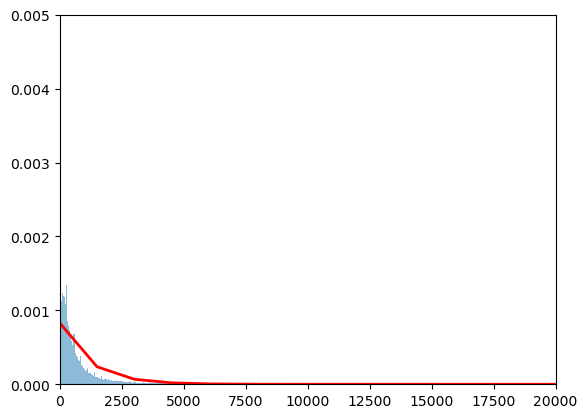

In [52]:

x = np.linspace(0, max(cds_coverage_file_df['RPK']), 1000)
pdf = stats.expon.pdf(x, scale=scale)
plt.hist(cds_coverage_file_df['RPK'], density=True, alpha=0.5, bins=35000)
plt.xlim(0, 20000)      # x-axis range
plt.ylim(0, 0.005)     # y-axis range





plt.plot(x, pdf, 'r-', lw=2)
plt.show()

In [53]:
stats.kstest(cds_coverage_file_df['RPK'], 'expon', args=(0, scale))

KstestResult(statistic=0.2545920452677238, pvalue=0.0, statistic_location=560.0, statistic_sign=1)

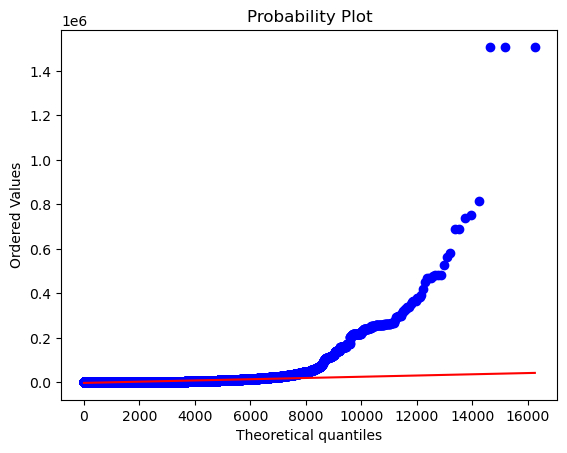

In [54]:
stats.probplot(cds_coverage_file_df['RPK'], dist="expon", sparams=(0, scale), plot=plt)


plt.show()

In [55]:
stats.anderson(cds_coverage_file_df['RPK'], dist='expon')

AndersonResult(statistic=inf, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=1203.0493353335562)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [56]:
cds_coverage_file_df_filtered = cds_coverage_file_df[cds_coverage_file_df['RPK'] > 0]

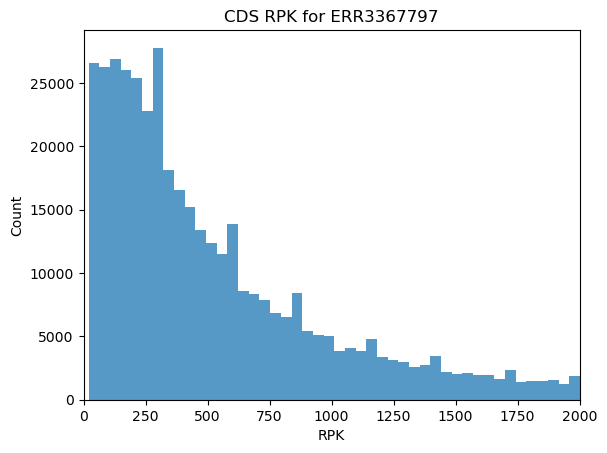

In [57]:
    ax = sbn.histplot(
        cds_coverage_file_df_filtered, x='RPK', bins=35000)


    ax.set_xlim(0, 2000)
    ax.set_title(f'CDS RPK for {sample}')
    plt.show()

In [58]:
stats.anderson(cds_coverage_file_df_filtered['RPK'], dist='expon')

AndersonResult(statistic=57747.913075181656, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=1338.4981536240814)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [59]:
distributions = [stats.expon, stats.weibull_min, stats.gamma, stats.lognorm]
fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "loglik": loglik}



fits

{'expon': {'params': (20.0, 1318.4981536240814),
  'AIC': 7493829.393077211,
  'loglik': -3746912.6965386057},
 'weibull_min': {'params': (0.2737310697942986,
   19.999999999999996,
   42.54811626110365),
  'AIC': 7718777.881566273,
  'loglik': -3859385.9407831365},
 'gamma': {'params': (1.157871173170163e-05,
   19.999999999999858,
   14.53362793794743),
  'AIC': 98677550.72566411,
  'loglik': -49338772.362832054},
 'lognorm': {'params': (1.3277220209381964,
   8.254641361217468,
   449.0747178088214),
  'AIC': 7150781.298709172,
  'loglik': -3575387.649354586}}

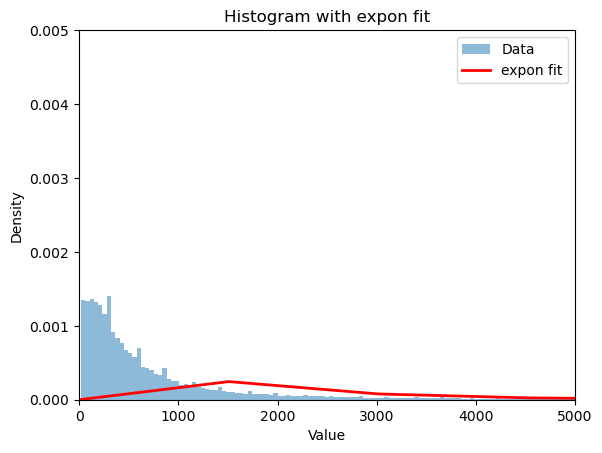

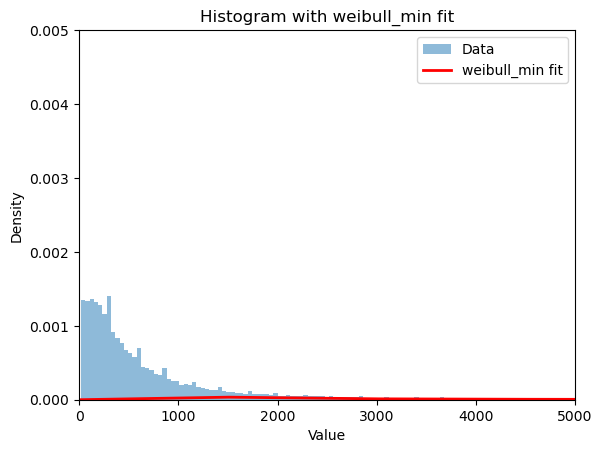

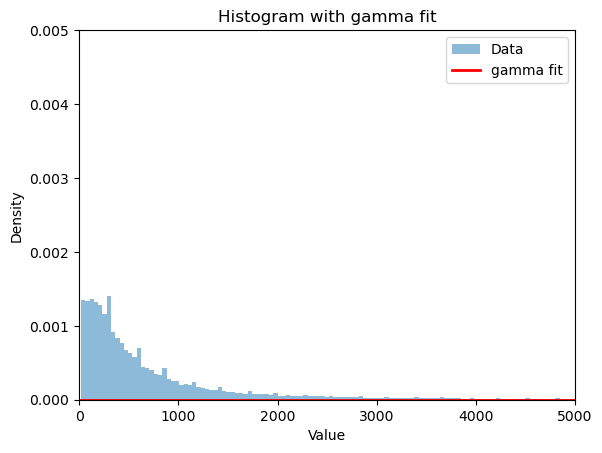

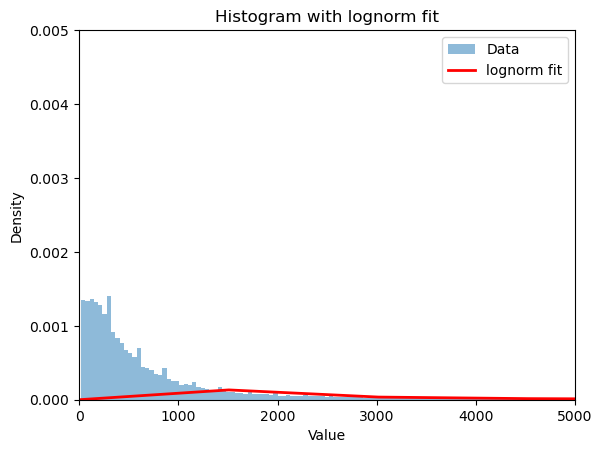

{'expon': {'params': (20.0, 1318.4981536240814),
  'AIC': 7493829.393077211,
  'loglik': -3746912.6965386057},
 'weibull_min': {'params': (0.2737310697942986,
   19.999999999999996,
   42.54811626110365),
  'AIC': 7718777.881566273,
  'loglik': -3859385.9407831365},
 'gamma': {'params': (1.157871173170163e-05,
   19.999999999999858,
   14.53362793794743),
  'AIC': 98677550.72566411,
  'loglik': -49338772.362832054},
 'lognorm': {'params': (1.3277220209381964,
   8.254641361217468,
   449.0747178088214),
  'AIC': 7150781.298709172,
  'loglik': -3575387.649354586}}

In [60]:
distributions = [stats.expon, stats.weibull_min, stats.gamma, stats.lognorm]
fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "loglik": loglik}


    plt.hist(cds_coverage_file_df_filtered['RPK'], bins=35000, density=True, alpha=0.5, label='Data')
    plt.xlim(0, 5000)      # x-axis range
    plt.ylim(0, 0.005)     # y-axis range
    x = np.linspace(0, max(cds_coverage_file_df_filtered['RPK']), 1000)
    pdf_fitted = dist.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')
    


    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Histogram with {dist.name} fit')
    plt.legend()
    plt.show()

fits

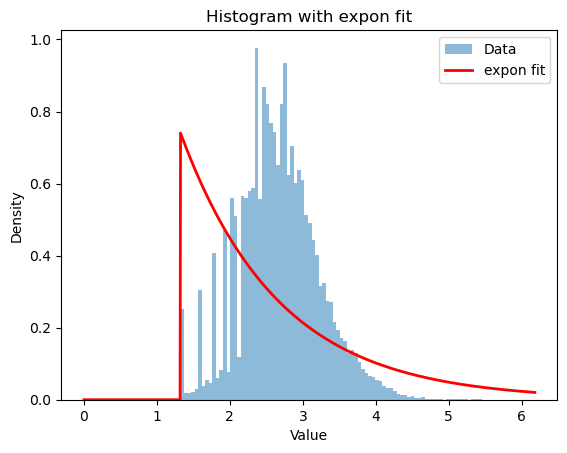

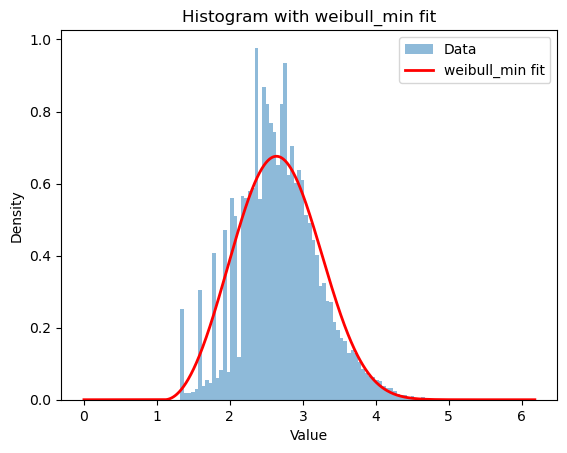

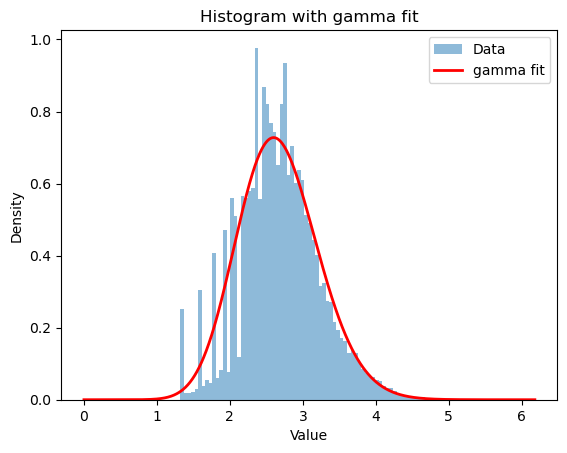

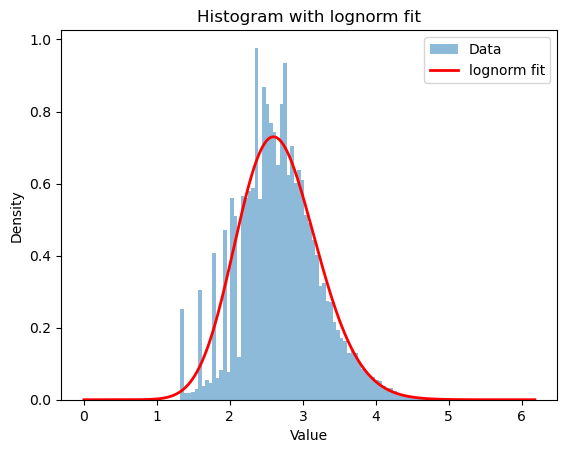

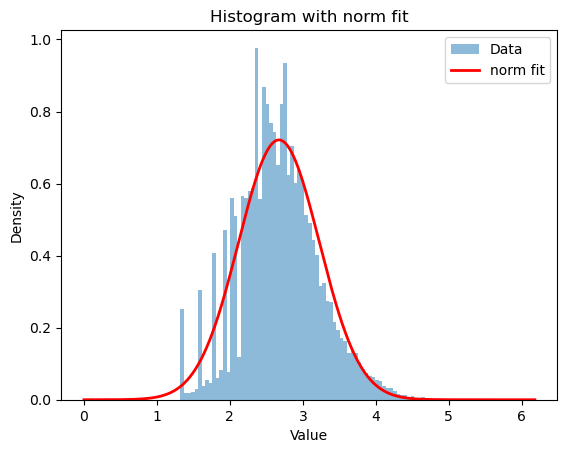

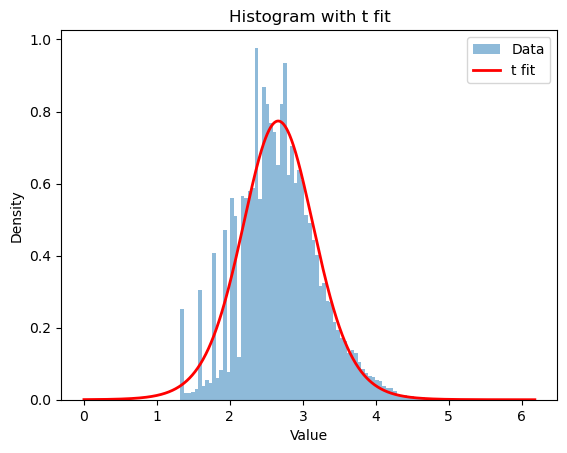

{'expon': {'params': (1.3222192947339193, 1.34953158909359),
  'AIC': 1190114.0133373272,
  'loglik': -595055.0066686636},
 'weibull_min': {'params': (3.025730853443941,
   1.102838360195526,
   1.75220824748622),
  'AIC': 759379.9557291375,
  'loglik': -379686.97786456876},
 'gamma': {'params': (57.603839689712586,
   -1.5197496608435592,
   0.07276425668999706),
  'AIC': 750273.0769856321,
  'loglik': -375133.53849281603},
 'lognorm': {'params': (0.09160317949816192,
   -3.345572491995141,
   5.992115480876395),
  'AIC': 750001.0053863674,
  'loglik': -374997.5026931837},
 'norm': {'params': (2.6717508838275092, 0.5531457445921538),
  'AIC': 757059.5229255254,
  'loglik': -378527.7614627627},
 't': {'params': (11.889225537392981, 2.6613791849751163, 0.5049162867980241),
  'AIC': 752067.1795350285,
  'loglik': -376030.58976751426}}

In [61]:
distributions = [stats.expon, stats.weibull_min, stats.gamma, stats.lognorm, stats.norm, stats.t]
fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['log_RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['log_RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "loglik": loglik}


    plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=100, density=True, alpha=0.5, label='Data')



    x = np.linspace(0, max(cds_coverage_file_df_filtered['log_RPK']), 1000)
    pdf_fitted = dist.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')
    


    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Histogram with {dist.name} fit')
    plt.legend()
    plt.show()
fits



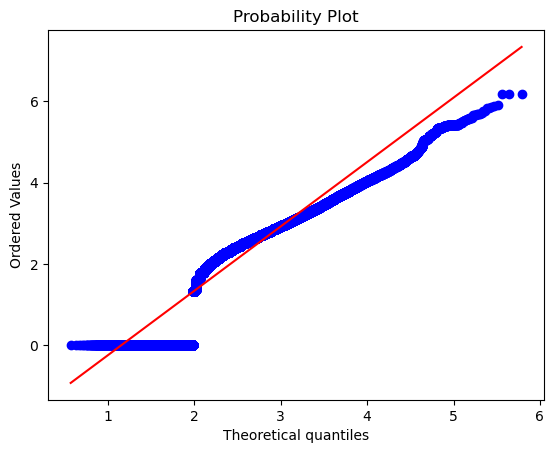

In [62]:
 stats.probplot(cds_coverage_file_df['log_RPK'], dist="gamma", sparams=(57.603839689712586,
   -1.5197496608435592,
   0.07276425668999706), plot=plt)




plt.show()

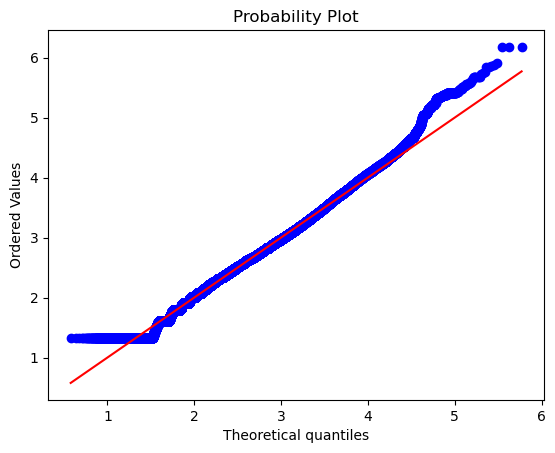

In [63]:
 stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="gamma", sparams=(57.603839689712586,


   -1.5197496608435592,
   0.07276425668999706), plot=plt)




plt.show()

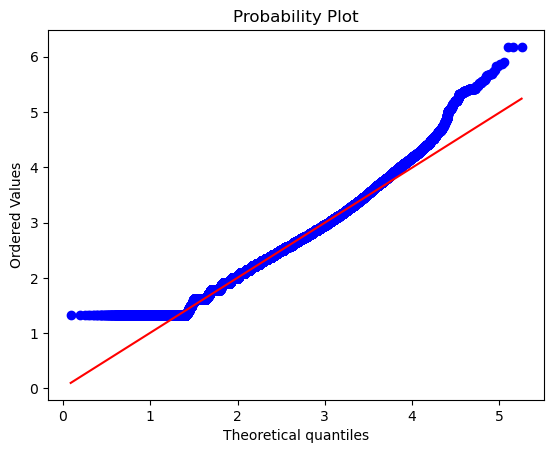

In [64]:
 stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="norm", sparams=(2.6717508838275092, 0.5531457445921538), plot=plt)








plt.show()

In [65]:
stats.anderson(cds_coverage_file_df_filtered['log_RPK'], dist='norm')

AndersonResult(statistic=763.7972208414576, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.6717508838275092, scale=0.5531463487014662)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

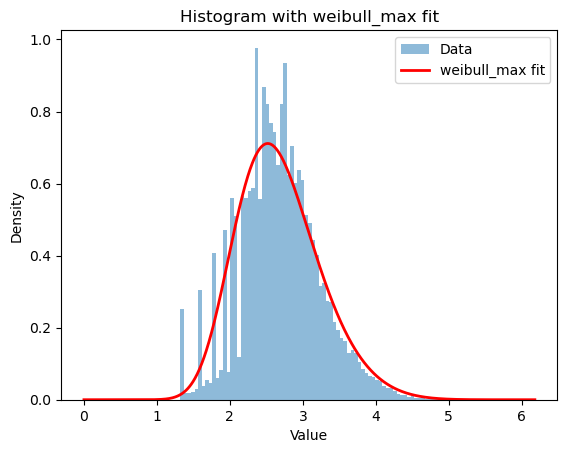

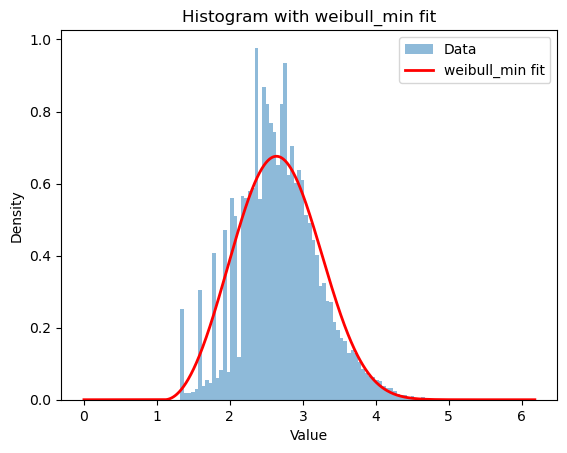

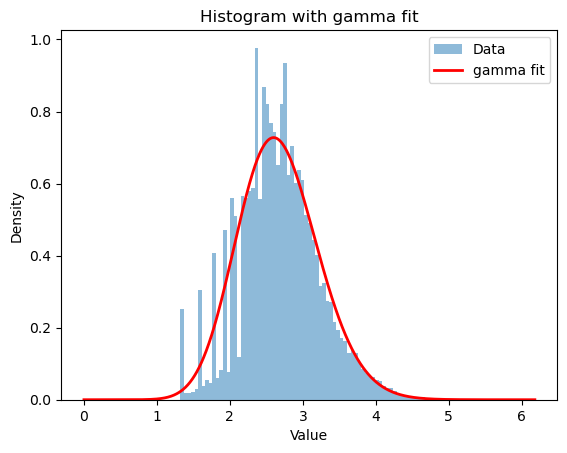

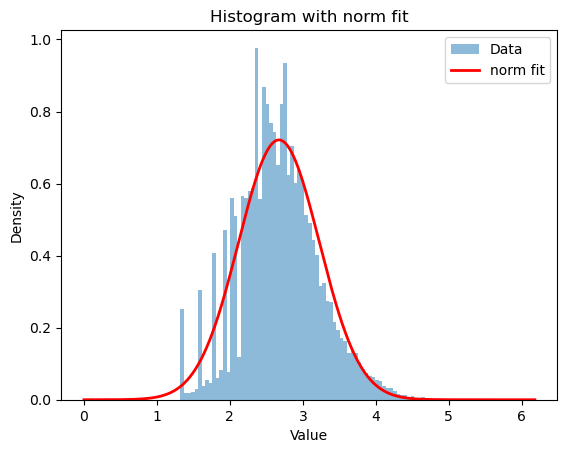

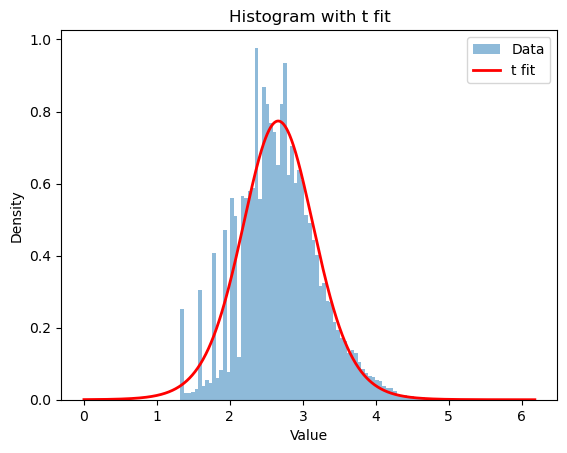

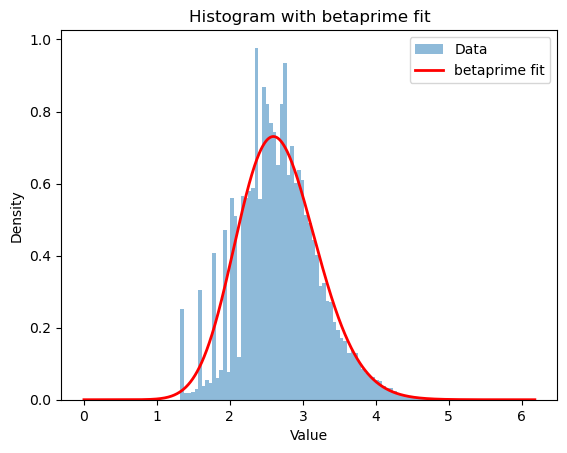

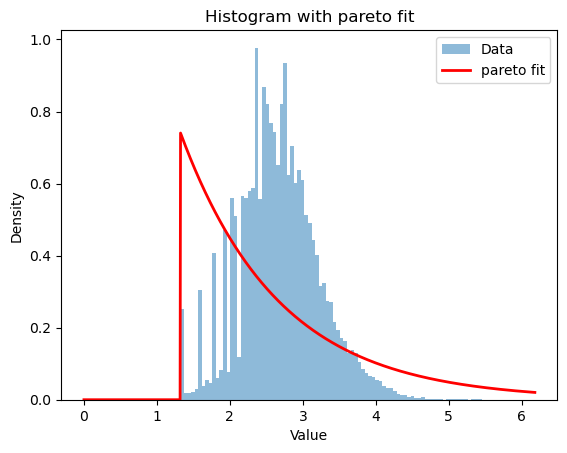

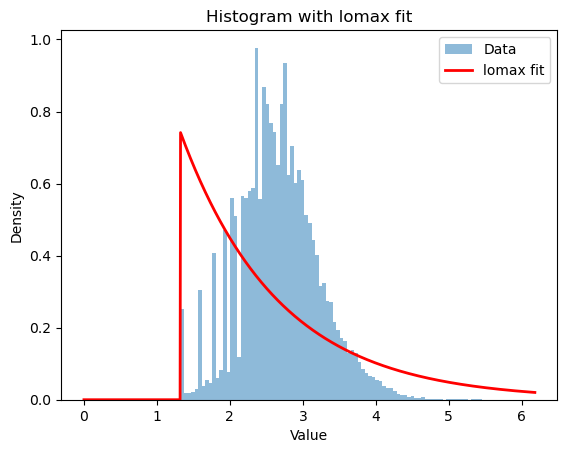

{'weibull_max': {'params': (7.170070607476967,
   6.187190335010698,
   3.74634205293626),
  'AIC': 757711.0201316511,
  'loglik': -378852.51006582554},
 'weibull_min': {'params': (3.025730853443941,
   1.102838360195526,
   1.75220824748622),
  'AIC': 759379.9557291375,
  'loglik': -379686.97786456876},
 'gamma': {'params': (57.603839689712586,
   -1.5197496608435592,
   0.07276425668999706),
  'AIC': 750273.0769856321,
  'loglik': -375133.53849281603},
 'norm': {'params': (2.6717508838275092, 0.5531457445921538),
  'AIC': 757059.5229255254,
  'loglik': -378527.7614627627},
 't': {'params': (11.889225537392981, 2.6613791849751163, 0.5049162867980241),
  'AIC': 752067.1795350285,
  'loglik': -376030.58976751426},
 'betaprime': {'params': (901.7457525904945,
   209.20302676999438,
   -4.49548578330111,
   1.654831171508115),
  'AIC': 749908.2885264984,
  'loglik': -374950.1442632492},
 'pareto': {'params': (99455048.07279915,
   -134217726.67778064,
   134217727.99999993),
  'AIC': 1190

In [66]:
distributions = [stats.weibull_max, stats.weibull_min, stats.gamma,  stats.norm, stats.t, stats.betaprime, stats.pareto, stats.lomax]


fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['log_RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['log_RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "loglik": loglik}


    plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=100, density=True, alpha=0.5, label='Data')



    x = np.linspace(0, max(cds_coverage_file_df_filtered['log_RPK']), 1000)
    pdf_fitted = dist.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')
    


    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Histogram with {dist.name} fit')
    plt.legend()
    plt.show()
fits

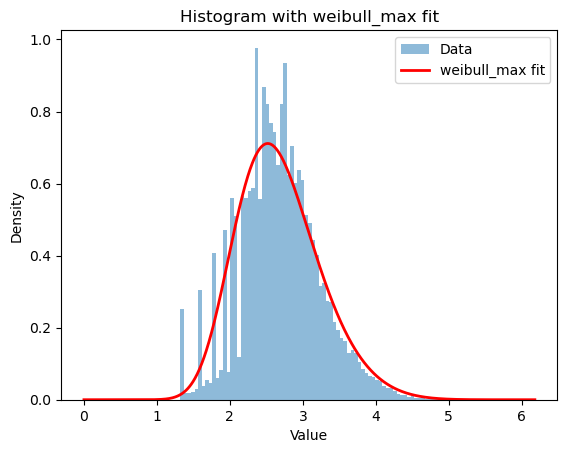

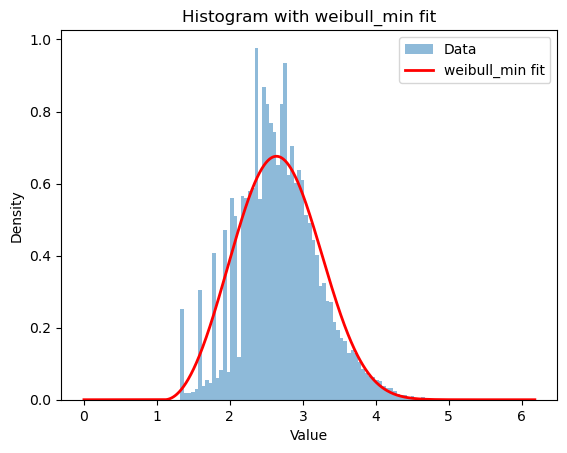

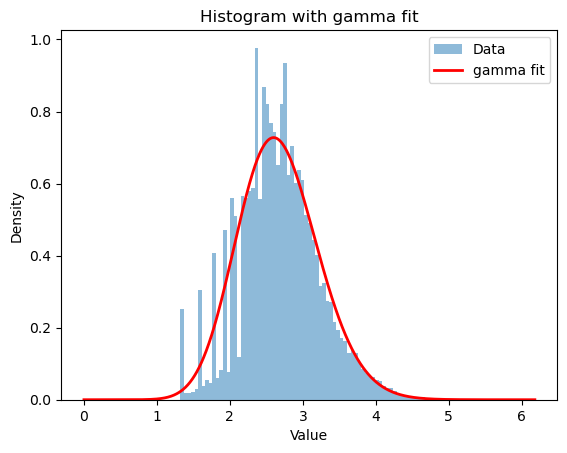

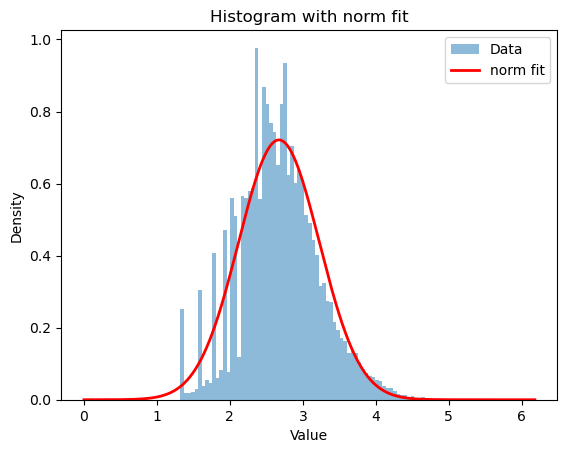

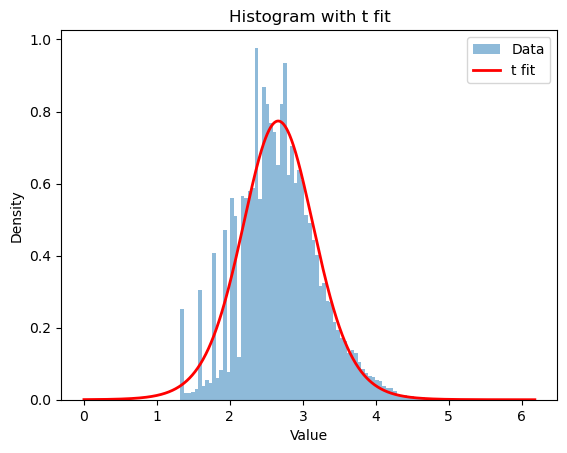

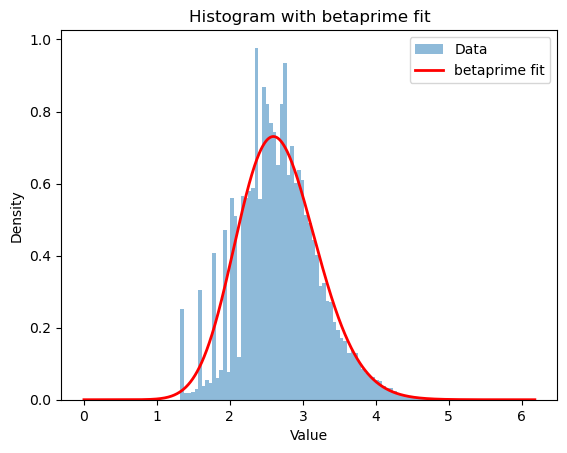

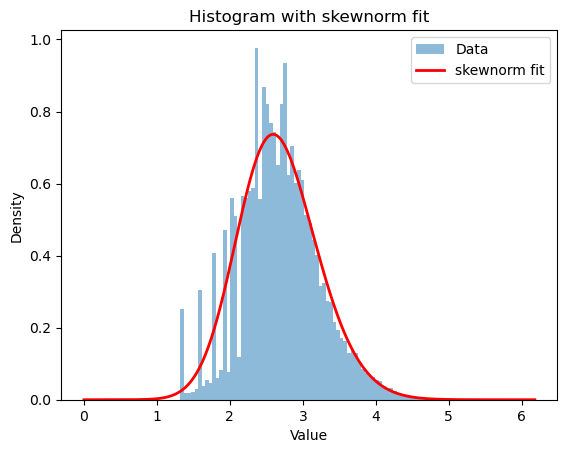

{'weibull_max': {'params': (7.170070607476967,
   6.187190335010698,
   3.74634205293626),
  'AIC': 757711.0201316511,
  'loglik': -378852.51006582554},
 'weibull_min': {'params': (3.025730853443941,
   1.102838360195526,
   1.75220824748622),
  'AIC': 759379.9557291375,
  'loglik': -379686.97786456876},
 'gamma': {'params': (57.603839689712586,
   -1.5197496608435592,
   0.07276425668999706),
  'AIC': 750273.0769856321,
  'loglik': -375133.53849281603},
 'norm': {'params': (2.6717508838275092, 0.5531457445921538),
  'AIC': 757059.5229255254,
  'loglik': -378527.7614627627},
 't': {'params': (11.889225537392981, 2.6613791849751163, 0.5049162867980241),
  'AIC': 752067.1795350285,
  'loglik': -376030.58976751426},
 'betaprime': {'params': (901.7457525904945,
   209.20302676999438,
   -4.49548578330111,
   1.654831171508115),
  'AIC': 749908.2885264984,
  'loglik': -374950.1442632492},
 'skewnorm': {'params': (1.418625543999966,
   2.197750407803901,
   0.7284525489995257),
  'AIC': 7496

In [67]:
distributions = [stats.weibull_max, stats.weibull_min, stats.gamma,  stats.norm, stats.t, stats.betaprime, stats.skewnorm]






fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['log_RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['log_RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "loglik": loglik}


    plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=100, density=True, alpha=0.5, label='Data')



    x = np.linspace(0, max(cds_coverage_file_df_filtered['log_RPK']), 1000)
    pdf_fitted = dist.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')
    


    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Histogram with {dist.name} fit')
    plt.legend()
    plt.show()
fits

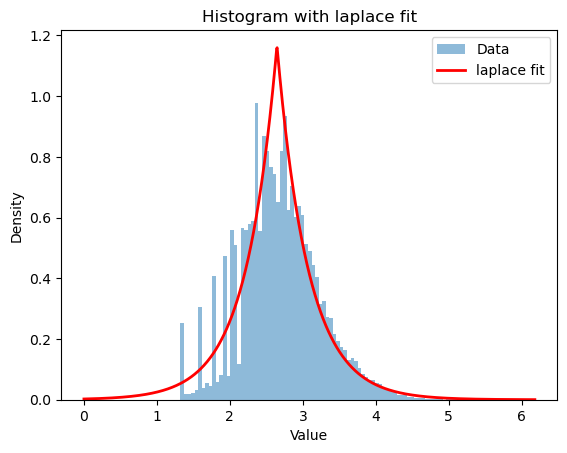

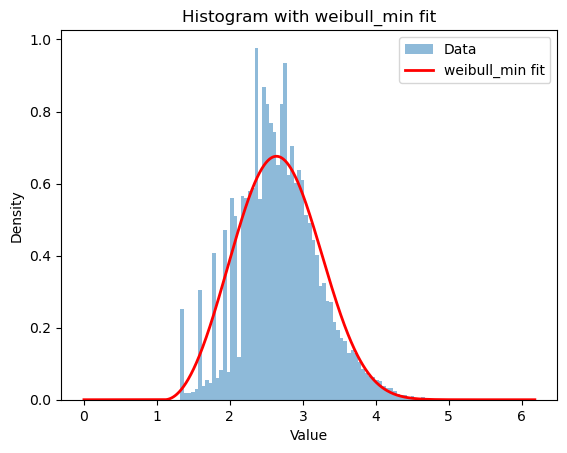

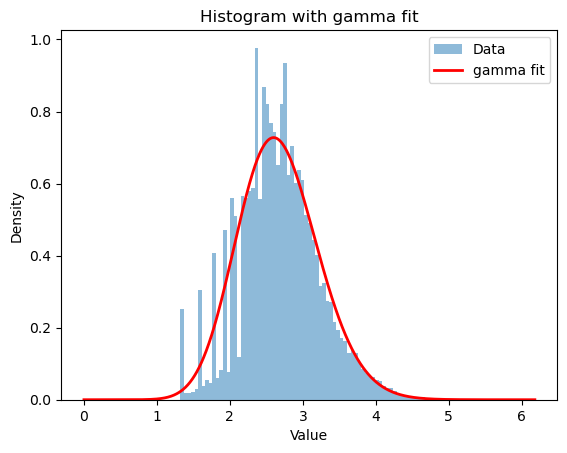

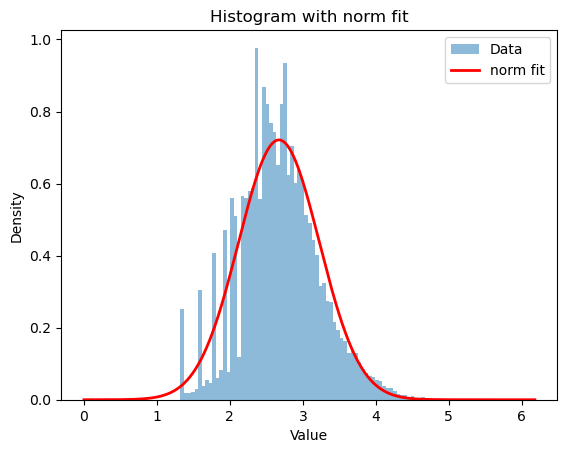

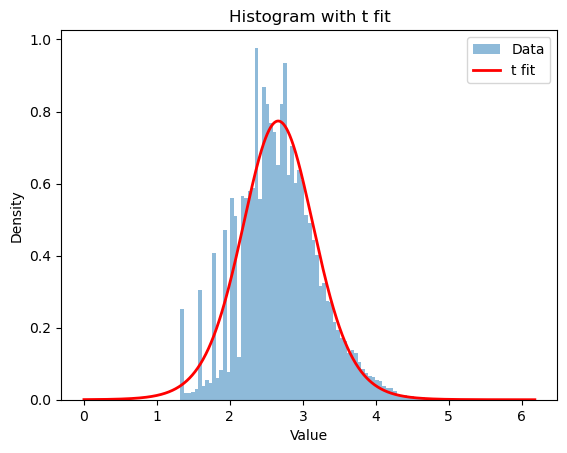

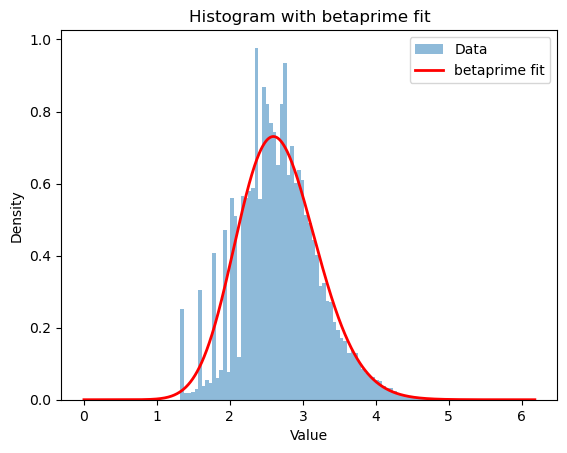

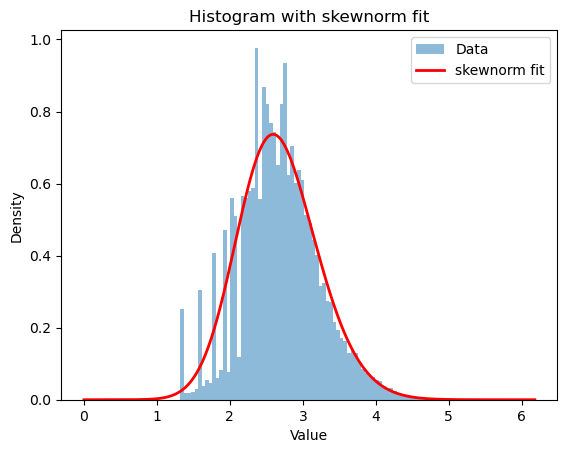

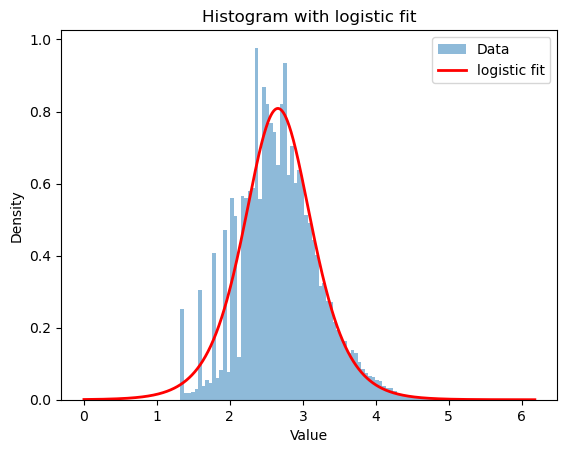

{'laplace': {'params': (2.6444385894678386, 0.42877413522831903),
  'AIC': 774930.4505564204,
  'BIC': 774952.5190191659,
  'loglik': -387463.2252782102},
 'weibull_min': {'params': (3.025730853443941,
   1.102838360195526,
   1.75220824748622),
  'AIC': 759379.9557291375,
  'BIC': 759413.0584232558,
  'loglik': -379686.97786456876},
 'gamma': {'params': (57.603839689712586,
   -1.5197496608435592,
   0.07276425668999706),
  'AIC': 750273.0769856321,
  'BIC': 750306.1796797503,
  'loglik': -375133.53849281603},
 'norm': {'params': (2.6717508838275092, 0.5531457445921538),
  'AIC': 757059.5229255254,
  'BIC': 757081.591388271,
  'loglik': -378527.7614627627},
 't': {'params': (11.889225537392981, 2.6613791849751163, 0.5049162867980241),
  'AIC': 752067.1795350285,
  'BIC': 752100.2822291468,
  'loglik': -376030.58976751426},
 'betaprime': {'params': (901.7457525904945,
   209.20302676999438,
   -4.49548578330111,
   1.654831171508115),
  'AIC': 749908.2885264984,
  'BIC': 749952.4254519

In [68]:
distributions = [stats.laplace, stats.weibull_min, stats.gamma,  stats.norm, stats.t, stats.betaprime, stats.skewnorm, stats.logistic]






fits = {}

for dist in distributions:
    params = dist.fit(cds_coverage_file_df_filtered['log_RPK'])
    loglik = np.sum(dist.logpdf(cds_coverage_file_df_filtered['log_RPK'], *params))
    k = len(params)
    aic = 2*k - 2*loglik
    bic = np.log(len(cds_coverage_file_df_filtered['log_RPK']))*k - 2*loglik
    fits[dist.name] = {"params": params, "AIC": aic, "BIC": bic, "loglik": loglik}


    plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=100, density=True, alpha=0.5, label='Data')



    x = np.linspace(0, max(cds_coverage_file_df_filtered['log_RPK']), 1000)
    pdf_fitted = dist.pdf(x, *params)
    plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')
    


    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Histogram with {dist.name} fit')
    plt.legend()
    plt.show()
fits

In [69]:
fits['gamma']['params']


(57.603839689712586, -1.5197496608435592, 0.07276425668999706)

((array([0.43034012, 0.51251318, 0.55710842, ..., 5.4986635 , 5.56972998,
         5.7011532 ]),
  array([1.32221929, 1.32221929, 1.32221929, ..., 6.17817694, 6.17817694,
         6.17817694])),
 (1.0000180048969491, -0.0011042312789859565, 0.9983607340203968))

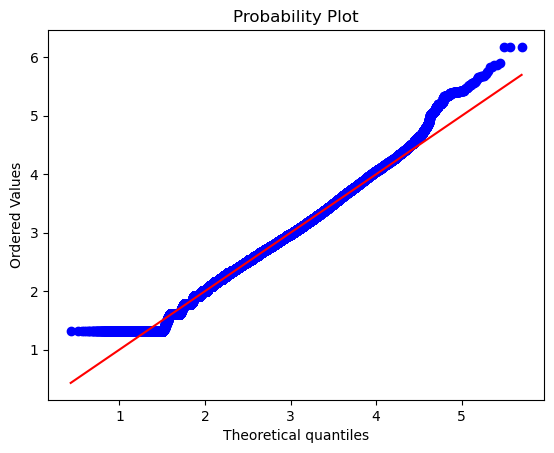

In [70]:
stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="skewnorm", sparams=(1.418625543999966,


   2.197750407803901,
   0.7284525489995257), plot=plt)

In [71]:
from scipy.stats import skewnorm, kstest

# Fit skew-normal
alpha, loc, scale = skewnorm.fit(cds_coverage_file_df_filtered['log_RPK'])

# KS test
D, p_value = kstest(cds_coverage_file_df_filtered['log_RPK'], 'skewnorm', args=(alpha, loc, scale))
print(D, p_value)



0.025537084875455557 8.448773740795304e-260


In [72]:
len(cds_coverage_file_df_filtered['log_RPK'])

457820

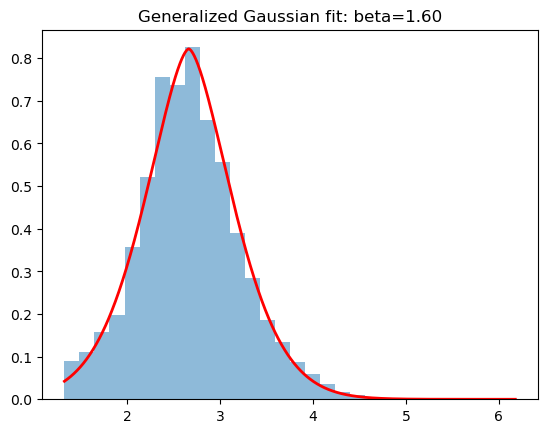

In [73]:
from scipy.stats import gennorm

# Fit to data
beta, loc, scale = gennorm.fit(cds_coverage_file_df_filtered['log_RPK'])

# PDF for plotting
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(min(cds_coverage_file_df_filtered['log_RPK']), max(cds_coverage_file_df_filtered['log_RPK']), 1000)
pdf = gennorm.pdf(x, beta, loc=loc, scale=scale)

plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=30, density=True, alpha=0.5)
plt.plot(x, pdf, 'r-', lw=2)
plt.title(f'Generalized Gaussian fit: beta={beta:.2f}')
plt.show()

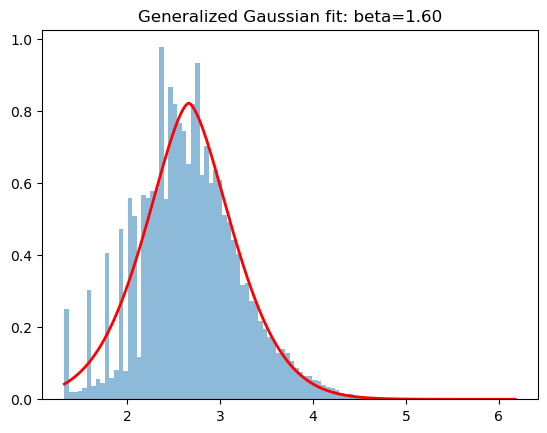

In [74]:
from scipy.stats import gennorm

# Fit to data
beta, loc, scale = gennorm.fit(cds_coverage_file_df_filtered['log_RPK'])

# PDF for plotting
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(min(cds_coverage_file_df_filtered['log_RPK']), max(cds_coverage_file_df_filtered['log_RPK']), 1000)
pdf = gennorm.pdf(x, beta, loc=loc, scale=scale)

plt.hist(cds_coverage_file_df_filtered['log_RPK'], bins=100, density=True, alpha=0.5)


plt.plot(x, pdf, 'r-', lw=2)
plt.title(f'Generalized Gaussian fit: beta={beta:.2f}')
plt.show()

In [75]:
loglik = np.sum(gennorm.logpdf(cds_coverage_file_df_filtered['log_RPK'], beta, loc=loc, scale=scale))

In [76]:
loc

2.6614124911568258

In [77]:
k = 3  # number of estimated parameters
AIC = 2*k - 2*loglik
print("AIC:", AIC)



AIC: 751769.9595751448


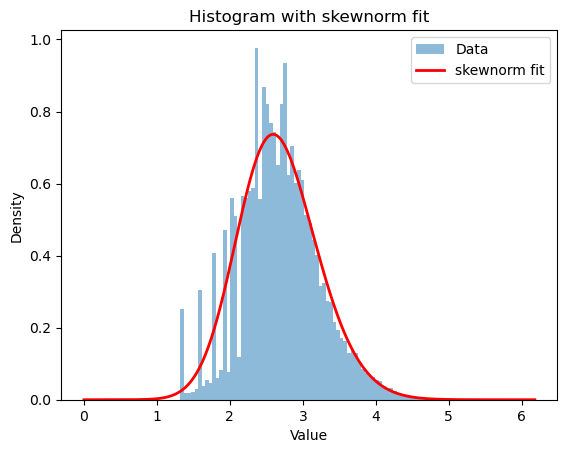

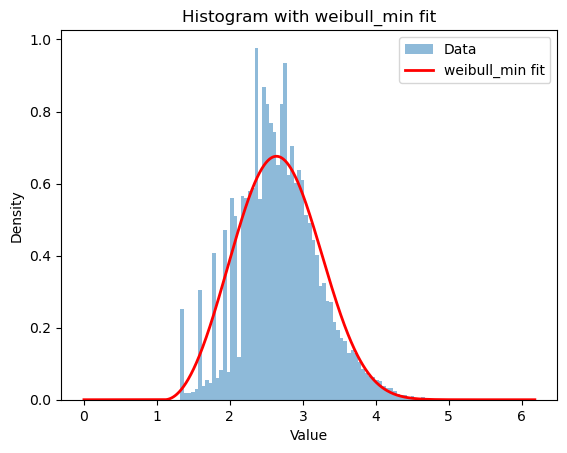

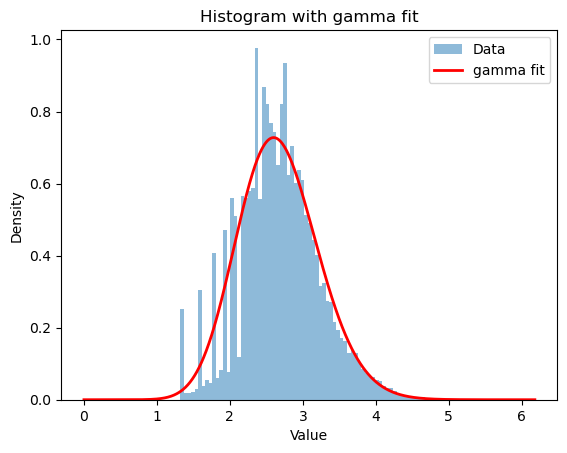

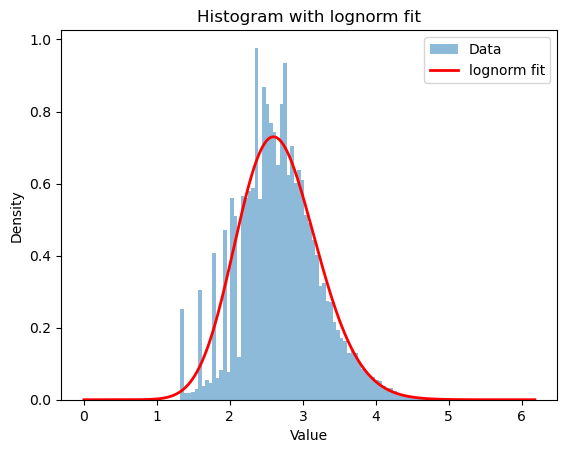

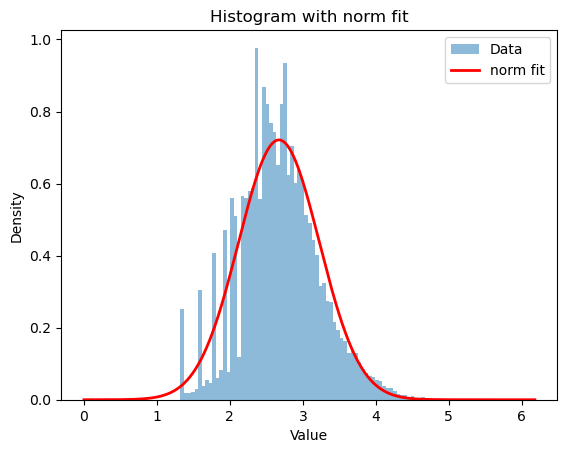

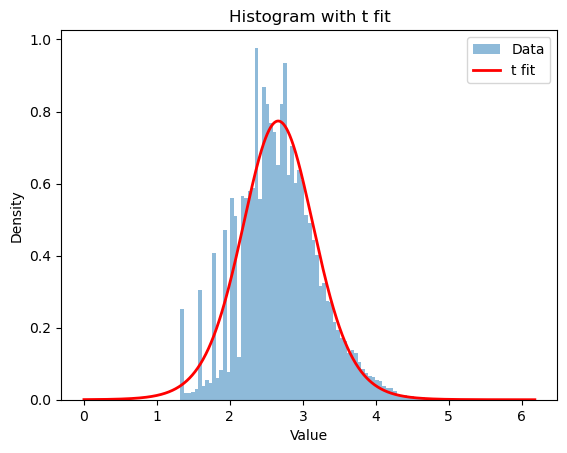

{'skewnorm': {'params': (1.418625543999966, 2.197750407803901, 0.7284525489995257), 'AIC': 749670.5287140084, 'BIC': 749703.6314081267, 'loglik': -374832.2643570042}, 'weibull_min': {'params': (3.025730853443941, 1.102838360195526, 1.75220824748622), 'AIC': 759379.9557291375, 'BIC': 759413.0584232558, 'loglik': -379686.97786456876}, 'gamma': {'params': (57.603839689712586, -1.5197496608435592, 0.07276425668999706), 'AIC': 750273.0769856321, 'BIC': 750306.1796797503, 'loglik': -375133.53849281603}, 'lognorm': {'params': (0.09160317949816192, -3.345572491995141, 5.992115480876395), 'AIC': 750001.0053863674, 'BIC': 750034.1080804857, 'loglik': -374997.5026931837}, 'norm': {'params': (2.6717508838275092, 0.5531457445921538), 'AIC': 757059.5229255254, 'BIC': 757081.591388271, 'loglik': -378527.7614627627}, 't': {'params': (11.889225537392981, 2.6613791849751163, 0.5049162867980241), 'AIC': 752067.1795350285, 'BIC': 752100.2822291468, 'loglik': -376030.58976751426}}
best distribution in term

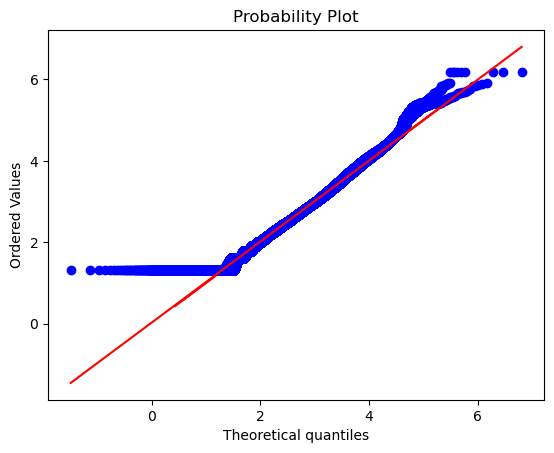

In [78]:
    # FILTER OUT VALUES THAT ARE 0
    from scipy import stats
    cds_coverage_file_df_filtered = cds_coverage_file_df[cds_coverage_file_df['RPK'] > 0]
    distributions = [stats.skewnorm, stats.weibull_min,
                     stats.gamma, stats.lognorm, stats.norm, stats.t]
    fits = {}

    for dist in distributions:
        params = dist.fit(cds_coverage_file_df_filtered['log_RPK'])
        loglik = np.sum(dist.logpdf(
            cds_coverage_file_df_filtered['log_RPK'], *params))
        k = len(params)
        aic = 2*k - 2*loglik
        bic = np.log(
            len(cds_coverage_file_df_filtered['log_RPK']))*k - 2*loglik
        fits[dist.name] = {"params": params,
                           "AIC": aic, "BIC": bic, "loglik": loglik}

        plt.hist(cds_coverage_file_df_filtered['log_RPK'],
                 bins=100, density=True, alpha=0.5, label='Data')

        x = np.linspace(0, max(cds_coverage_file_df_filtered['log_RPK']), 1000)
        pdf_fitted = dist.pdf(x, *params)
        plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'{dist.name} fit')

        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Histogram with {dist.name} fit')
        plt.legend()
        plt.savefig(os.path.join(outdir, f'{sample}_{dist}_fit.png'))
        plt.show()
    print(fits)

    stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="gamma",
                   sparams=fits['gamma']['params'], plot=plt)
    plt.savefig(os.path.join(
        outdir, f'{sample}_gamma_QQ_plot.png'), dpi=300, bbox_inches='tight')

    stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="skewnorm",
                   sparams=fits['skewnorm']['params'], plot=plt)
    plt.savefig(os.path.join(
        outdir, f'{sample}_skewnorm_QQ_plot.png'), dpi=300, bbox_inches='tight')

    stats.probplot(cds_coverage_file_df_filtered['log_RPK'], dist="t",
                   sparams=fits['t']['params'], plot=plt)
    plt.savefig(os.path.join(
        outdir, f'{sample}_t_QQ_plot.png'), dpi=300, bbox_inches='tight')

    lowest_BIC = np.inf
    for dist, values in fits.items():
        if values['BIC'] < lowest_BIC:
            best_dist = dist

    print(f'best distribution in terms of BIC is {best_dist}')
    print(fits[best_dist])

    lowest_AIC = np.inf
    for dist, values in fits.items():
        if values['AIC'] < lowest_AIC:
            best_dist = dist

    print(f'best distribution in terms of AIC is {best_dist}')
    print(fits[best_dist])

In [79]:
# log RPK value
# need to see whether 3 primes are smaller than this, the larger, the more permissive

fits[best_dist]
alpha = 0.05
L = stats.t.ppf(alpha, fits[best_dist]['params'][0], fits[best_dist]['params'][1], fits[best_dist]['params'][2])



In [81]:
stats.best_dist.ppf(alpha, *fits[best_dist]['params'])

AttributeError: module 'scipy.stats' has no attribute 'best_dist'

In [74]:
L

1.7607740496452418

In [90]:
# calculate prediction interval and use to see whether 3 prime UTRs fall within
# Maybe need to do multiple test correction as well





# this does not directly calculate the predictive interval though, here is steop bu step from ChatGPT
# Example: fitted t-distribution parameters
df, mu, s = stats.t.fit(cds_coverage_file_df_filtered['log_RPK'])  # df, loc, scale
n = len(cds_coverage_file_df_filtered['log_RPK'])

L = stats.t.ppf(alpha, df = df, loc = mu, scale = s)
print(L)

# Desired coverage level
alpha = 0.1  # 95% PI

# t quantile for two-sided PI
t_quantile = stats.t.ppf(alpha, df)

# Prediction interval
# only interested in lower
PI_lower = mu + t_quantile * s * np.sqrt(1 + 1/n)

print("95% prediction interval:", PI_lower)


1.7607740496452418
95% prediction interval: 1.9762306624000692


In [91]:
three_prime_coverage_file_df_to_filter = three_prime_coverage_file_df[three_prime_coverage_file_df['log_RPK'] > 0]

In [86]:
three_prime_coverage_file_df_to_filter.shape

(16572, 10)

In [92]:
three_prime_coverage_file_df[three_prime_coverage_file_df['log_RPK'] < PI_lower]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
0,1,944203,944253,ENSG00000188976|ENST00000327044|0_1,0,0,50,0.0,0.0,0.0
1,1,944253,944303,ENSG00000188976|ENST00000327044|0_2,0,0,50,0.0,0.0,0.0
2,1,944303,944353,ENSG00000188976|ENST00000327044|0_3,0,0,50,0.0,0.0,0.0
3,1,944353,944403,ENSG00000188976|ENST00000327044|0_4,0,0,50,0.0,0.0,0.0
4,1,944403,944453,ENSG00000188976|ENST00000327044|0_5,0,0,50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
146161,X,155491361,155491411,ENSG00000185973|ENST00000334398|20368_48,0,0,50,0.0,0.0,0.0
146162,X,155491411,155491461,ENSG00000185973|ENST00000334398|20368_49,0,0,50,0.0,0.0,0.0
146163,X,155491461,155491511,ENSG00000185973|ENST00000334398|20368_50,0,0,50,0.0,0.0,0.0
146164,X,155491511,155491534,ENSG00000185973|ENST00000334398|20368_51,0,0,23,0.0,0.0,0.0


In [93]:
three_prime_coverage_file_df_to_filter[three_prime_coverage_file_df_to_filter['log_RPK'] > PI_lower]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
9,1,944653,944693,ENSG00000188976|ENST00000327044|0_10,5,13,40,0.325000,125.000000,2.100371
72,1,1255162,1255202,ENSG00000160087|ENST00000349431|10_26,5,34,40,0.850000,125.000000,2.100371
80,1,1373780,1373800,"ENSG00000175756|ENST00000338370,ENSG0000017575...",7,20,20,1.000000,350.000000,2.545307
84,1,1402059,1402082,ENSG00000242485|ENST00000344843|21_4,15,23,23,1.000000,652.173913,2.815029
139,1,1786936,1786986,ENSG00000078369|ENST00000378609|34_34,5,19,50,0.380000,100.000000,2.004321
...,...,...,...,...,...,...,...,...,...,...
145968,X,154436042,154436092,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.320000,220.000000,2.344392
145969,X,154436092,154436142,"ENSG00000071553|ENST00000619046,ENSG0000007155...",11,16,50,0.320000,220.000000,2.344392
146002,X,154477925,154477943,ENSG00000196976|ENST00000357360|20347_4,2,18,18,1.000000,111.111111,2.049649
146055,X,155120151,155120168,"ENSG00000185515|ENST00000330045,ENSG0000018551...",2,9,17,0.529412,117.647059,2.074257


In [94]:
three_prime_coverage_file_df_to_filter[three_prime_coverage_file_df_to_filter['log_RPK'] < PI_lower]

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
8,1,944603,944653,ENSG00000188976|ENST00000327044|0_9,1,29,50,0.580000,20.000000,1.322219
10,1,998964,999014,ENSG00000188290|ENST00000304952|3_1,1,28,50,0.560000,20.000000,1.322219
11,1,999014,999058,ENSG00000188290|ENST00000304952|3_2,1,29,44,0.659091,22.727273,1.375248
12,1,1054982,1055032,ENSG00000188157|ENST00000379370|4_1,1,27,50,0.540000,20.000000,1.322219
32,1,1055982,1056032,ENSG00000188157|ENST00000379370|4_21,1,30,50,0.600000,20.000000,1.322219
...,...,...,...,...,...,...,...,...,...,...
146037,X,154485512,154485538,ENSG00000102178|ENST00000369660|20349_2,1,25,26,0.961538,38.461538,1.596174
146046,X,154506371,154506421,ENSG00000071889|ENST00000447601|20351_5,1,29,50,0.580000,20.000000,1.322219
146048,X,154506471,154506521,ENSG00000071889|ENST00000447601|20351_7,1,29,50,0.580000,20.000000,1.322219
146052,X,154506671,154506721,ENSG00000071889|ENST00000447601|20351_11,1,28,50,0.560000,20.000000,1.322219


In [95]:
three_prime_original_for_strand_info = '/projects/splitorfs/work/Riboseq/Output/Riboseq_genomic_single_samples/resample_q10_expression_filter/NMD_genome/ERR3367797/3_primes_genomic_merged_numbered_ERR3367797.bed'

In [97]:
strand_info_df = pd.read_csv(three_prime_original_for_strand_info, sep = '\t', names = ['chr','start','stop','name','score','strand'])

In [99]:
strand_info_df['Gene'] = strand_info_df['name'].apply(lambda x: x.split('|')[0])


In [112]:
three_prime_coverage_file_df_filtered = three_prime_coverage_file_df[three_prime_coverage_file_df['log_RPK'] < PI_lower].copy()
three_prime_coverage_file_df_filtered

,chr,start,stop,3_prime_name,nr_overlap_reads,nr_bases_covered,length_3_prime_UTR,covered_fraction,RPK,log_RPK
0,1,944203,944253,ENSG00000188976|ENST00000327044|0_1,0,0,50,0.0,0.0,0.0
1,1,944253,944303,ENSG00000188976|ENST00000327044|0_2,0,0,50,0.0,0.0,0.0
2,1,944303,944353,ENSG00000188976|ENST00000327044|0_3,0,0,50,0.0,0.0,0.0
3,1,944353,944403,ENSG00000188976|ENST00000327044|0_4,0,0,50,0.0,0.0,0.0
4,1,944403,944453,ENSG00000188976|ENST00000327044|0_5,0,0,50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
146161,X,155491361,155491411,ENSG00000185973|ENST00000334398|20368_48,0,0,50,0.0,0.0,0.0
146162,X,155491411,155491461,ENSG00000185973|ENST00000334398|20368_49,0,0,50,0.0,0.0,0.0
146163,X,155491461,155491511,ENSG00000185973|ENST00000334398|20368_50,0,0,50,0.0,0.0,0.0
146164,X,155491511,155491534,ENSG00000185973|ENST00000334398|20368_51,0,0,23,0.0,0.0,0.0


In [105]:
strand_dict = dict(zip(strand_info_df['Gene'], strand_info_df['strand']))

In [113]:
three_prime_coverage_file_df_filtered['Gene'] = three_prime_coverage_file_df_filtered['3_prime_name'].apply(lambda x: x.split('|')[0])
three_prime_coverage_file_df_filtered['strand'] = three_prime_coverage_file_df_filtered['Gene'].map(strand_dict)

In [114]:
sum(three_prime_coverage_file_df_filtered['strand'] == '+')

73388

In [ ]:
three_prime_coverage_file_df_filtered['strand'] = three_prime_coverage_file_df_filtered['Gene'].map(strand_dict)
three_prime_coverage_file_df_filtered['score'] = 0


In [116]:
three_prime_coverage_file_df_filtered.loc[:, ['chr', 'start', 'stop', '3_prime_name', 'score', 'strand']]

,chr,start,stop,3_prime_name,score,strand
0,1,944203,944253,ENSG00000188976|ENST00000327044|0_1,0,-
1,1,944253,944303,ENSG00000188976|ENST00000327044|0_2,0,-
2,1,944303,944353,ENSG00000188976|ENST00000327044|0_3,0,-
3,1,944353,944403,ENSG00000188976|ENST00000327044|0_4,0,-
4,1,944403,944453,ENSG00000188976|ENST00000327044|0_5,0,-
...,...,...,...,...,...,...
146161,X,155491361,155491411,ENSG00000185973|ENST00000334398|20368_48,0,-
146162,X,155491411,155491461,ENSG00000185973|ENST00000334398|20368_49,0,-
146163,X,155491461,155491511,ENSG00000185973|ENST00000334398|20368_50,0,-
146164,X,155491511,155491534,ENSG00000185973|ENST00000334398|20368_51,0,-
